# 实战1

In [1]:
import pandas as pd
file_path='chipotle.tsv'

chipo=pd.read_csv(file_path,sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [2]:
# 查看前十行内容
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
# 数据集中有多少个列
len(chipo.columns)

5

In [4]:
chipo.shape[1]

5

In [5]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [7]:
# 查看被下单最多商品是什么
chipo[['item_name','quantity']].groupby('item_name').sum().sort_values(by=['quantity'],ascending=False).head(5)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [8]:
pd.DataFrame(chipo[['item_name','quantity']].groupby('item_name').sum().sort_values(by='quantity',ascending=False).iloc[0,:])

,Chicken Bowl
quantity,761


In [9]:
chipo[['item_name','quantity']].groupby('item_name').agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False).head(1)

,quantity
item_name,
Chicken Bowl,761


In [10]:
# item_name中有多少种商品被下单
len(chipo['item_name'].unique())

50

In [11]:
len(chipo.groupby('item_name'))

50

In [12]:
chipo['item_name'].nunique()

50

In [13]:
# 在choice——description中，下单次数最多的商品是什么？
chipo[['choice_description','order_id']].groupby('choice_description').count().sort_values(by='order_id',ascending=False).head(1)

,order_id
choice_description,
[Diet Coke],134


In [14]:
# 一共有多少件商品被下单
chipo['quantity'].sum()

4972

In [15]:
chipo['item_price'] = chipo['item_price'].str.strip('$').astype('float')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [16]:
# 收入revenue是多少?
revenue=(chipo['quantity']*chipo['item_price']).sum()
revenue

39237.02

In [17]:
print("收入(revenue):{}".format(revenue))


收入(revenue):39237.02


In [18]:
len(chipo['order_id'].unique())

1834

In [19]:
chipo['order_id'].nunique()

1834

In [20]:
# 每一单order 对应的平均总价是多少
chipo['item_price_sum']=chipo['quantity']*chipo['item_price']
chipo[['order_id','item_price_sum']].groupby('order_id').mean()

,item_price_sum
order_id,
1,2.890000
2,33.960000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


In [21]:
# 一共有多少种不同商品被售出
chipo['item_name'].nunique()

50

# 数据过滤与排序

In [22]:
import pandas as pd
filepath2='Euro2012.csv'
euro12=pd.read_csv(filepath2,sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [23]:
# 只抓取Goals这一列
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [24]:
euro12['Team'].nunique()

16

In [25]:
len(euro12.columns)

35

In [26]:
euro12.shape[1]

35

In [27]:
# 将数据集中的列team，yellow cards 
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [28]:
# 按照discipline 按照Red Cards 再yellow Cards
discipline.sort_values(by=['Red Cards','Yellow Cards'],ascending=True)


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [29]:
# 计算平均值
discipline[['Team','Yellow Cards']].groupby('Team').mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


In [30]:
# 找到goal 超过6的球队
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [31]:
# 选取字母G开头的球队数据
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [32]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [33]:
# 选取除了最后三列之外的全部列
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [34]:
#找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)
euro12[euro12['Team'].isin(['England','Italy','Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [35]:
euro12.loc[euro12['Team'].isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# 探索酒类消费数据

In [36]:
import pandas as pd 
import numpy as np

filepath3='drinks.csv'
drinks=pd.read_csv(filepath3)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [37]:
# 哪个大陆（continent）平均消耗的啤酒（beer）更多？
drinks[['continent','beer_servings']].groupby('continent').mean().sort_values(by='beer_servings',ascending=False)

,beer_servings
continent,
EU,193.777778
SA,175.083333
OC,89.687500
AF,61.471698
AS,37.045455


In [38]:
# 打印每个大陆的红酒消耗描述性统计值
drinks[['continent','wine_servings']].groupby('continent').describe()

wine_servings                                                   \
                  count        mean        std  min   25%    50%     75%   
continent                                                                  
AF                 53.0   16.264151  38.846419  0.0   1.0    2.0   13.00   
AS                 44.0    9.068182  21.667034  0.0   0.0    1.0    8.00   
EU                 45.0  142.222222  97.421738  0.0  59.0  128.0  195.00   
OC                 16.0   35.625000  64.555790  0.0   1.0    8.5   23.25   
SA                 12.0   62.416667  88.620189  1.0   3.0   12.0   98.50   

                  
             max  
continent         
AF         233.0  
AS         123.0  
EU         370.0  
OC         212.0  
SA         221.0

In [39]:
# 打印出每个大陆每种酒类别的消耗平均值
drinks[['continent','beer_servings',	'spirit_servings'	,'wine_servings']].groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,61.471698,16.339623,16.264151
AS,37.045455,60.840909,9.068182
EU,193.777778,132.555556,142.222222
OC,89.687500,58.437500,35.625000
SA,175.083333,114.750000,62.416667


In [40]:
drinks[['continent','beer_servings',	'spirit_servings'	,'wine_servings']].groupby('continent').median()

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,32.0,3.0,2.0
AS,17.5,16.0,1.0
EU,219.0,122.0,128.0
OC,52.5,37.0,8.5
SA,162.5,108.5,12.0


In [41]:
# 打印每个大陆对spirit饮品消耗的平均值，最大值，最小值
drinks[['continent','spirit_servings']].groupby('continent').agg(['mean','max','min'])

spirit_servings         
                     mean  max min
continent                         
AF              16.339623  152   0
AS              60.840909  326   0
EU             132.555556  373   0
OC              58.437500  254   0
SA             114.750000  302  25

# 探索数据

In [42]:
import pandas as pd
import numpy as np
filepath4='US_Crime_Rates_1960_2014.csv'
crime=pd.read_csv(filepath4)
crime.head(10)


,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [43]:
# 每一列数据类型都是什么
crime.dtypes

Unnamed: 0            int64
Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

In [44]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          55 non-null     int64
 1   Year                55 non-null     int64
 2   Population          55 non-null     int64
 3   Total               55 non-null     int64
 4   Violent             55 non-null     int64
 5   Property            55 non-null     int64
 6   Murder              55 non-null     int64
 7   Forcible_Rape       55 non-null     int64
 8   Robbery             55 non-null     int64
 9   Aggravated_assault  55 non-null     int64
 10  Burglary            55 non-null     int64
 11  Larceny_Theft       55 non-null     int64
 12  Vehicle_Theft       55 non-null     int64
dtypes: int64(13)
memory usage: 5.7 KB


In [45]:
crime.Year=pd.to_datetime(crime.Year,format='%Y')
crime.head()

,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [46]:
# year设置为索引
crime.set_index('Year',inplace=True)
crime.head()


,Unnamed: 0,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,,
1960-01-01,0,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,1,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,2,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,3,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,4,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [47]:
# 删除名为total的列
crime.drop(columns=['Total'],inplace=True)
crime.head()

,Unnamed: 0,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,0,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,1,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,2,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,3,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,4,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [48]:
# Resample both DataFrames
crimes = crime.resample('10AS').sum()
population = crime['Population'].resample('10AS').max()  # Make sure to select the 'Population' column before resampling

# Assign the resampled population to the crimes DataFrame
crimes['Population'] = population.values

# Alternatively, using align to ensure matching indices
crimes['Population'], _ = population.align(crimes, join='left')

crimes


C:\Users\W10\AppData\Local\Temp\ipykernel_8544\1257628385.py:2: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  crimes = crime.resample('10AS').sum()
C:\Users\W10\AppData\Local\Temp\ipykernel_8544\1257628385.py:3: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  population = crime['Population'].resample('10AS').max()  # Make sure to select the 'Population' column before resampling


,Unnamed: 0,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,45,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,145,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,245,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,345,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,445,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,260,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [49]:
# 何时是美国历史上生存最危险的年代
crime['crime_sum']=crime.sum(axis=1)-crime['Population']
crime['crime_rate']=((crime['crime_sum']/crime['Population'])/100).map(lambda x:format(x,'.2%'))
crime[['crime_rate']].sort_values(by='crime_rate',ascending=False).head()

,crime_rate
Year,
1980-01-01,0.12%
1981-01-01,0.12%
1991-01-01,0.12%
1990-01-01,0.12%
1987-01-01,0.11%


In [50]:
import pandas as pd
import numpy as np

raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}


data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)


all_data=pd.concat([data1,data2],axis=0)
all_data


,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [51]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [52]:
pd.merge(all_data,data3,on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16
5,4,Billy,Bonder,61
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [53]:
pd.merge(data1,data2,how='inner',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [54]:
pd.merge(data1,data2,how='outer',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# 探索风速数据

In [55]:
import pandas as pd
import datetime
filepath6='wind.csv'
wind=pd.read_csv(filepath6,sep='\s+',parse_dates=[[0,1,2]])
wind

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\W10\AppData\Local\Temp\ipykernel_8544\886139125.py:4: SyntaxWarning: invalid escape sequence '\s'
  wind=pd.read_csv(filepath6,sep='\s+',parse_dates=[[0,1,2]])
C:\Users\W10\AppData\Local\Temp\ipykernel_8544\886139125.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  wind=pd.read_csv(filepath6,sep='\s+',parse_dates=[[0,1,2]])
C:\Users\W10\AppData\Local\Temp\ipykernel_8544\886139125.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind=pd.read_csv(filepath6,sep='\s+',parse_dates=[[0,1,2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [56]:
def change_year(x):
    year = x.year - 100 if x.year > 1999 else x.year
    return datetime.date(year, x.month, x.day)

wind['Yr_Mo_Dy'] = wind['Yr_Mo_Dy'].apply(change_year).astype('datetime64[ns]')
wind

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [57]:
wind.set_index('Yr_Mo_Dy', inplace=True)
wind.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [58]:
wind.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [59]:
wind.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [60]:
# 对应每一个location 一共有多少完整数据

wind.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [61]:
wind.shape[0]-wind.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [62]:
wind.mean().mean()

10.227982360836938

In [63]:
# 创建一个loc——stats
loc_stats=wind.agg(['min','max','mean','std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [64]:
day_stats=wind.agg([np.min,np.max,np.mean,np.std],axis=1)
day_stats

C:\Users\W10\AppData\Local\Temp\ipykernel_8544\692444812.py:1: FutureWarning: The provided callable <function min at 0x0000020288E33C40> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  day_stats=wind.agg([np.min,np.max,np.mean,np.std],axis=1)
C:\Users\W10\AppData\Local\Temp\ipykernel_8544\692444812.py:1: FutureWarning: The provided callable <function max at 0x0000020288E33B00> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  day_stats=wind.agg([np.min,np.max,np.mean,np.std],axis=1)
C:\Users\W10\AppData\Local\Temp\ipykernel_8544\692444812.py:1: FutureWarning: The provided callable <function mean at 0x0000020288E3C540> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the 

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [65]:
# 对于每一个location ，计算一月份的平均风速
wind['date']=wind.index
wind['year']=wind['date'].apply(lambda x:x.year)
wind['month']=wind['date'].apply(lambda x:x.month)
wind['day']=wind['date'].apply(lambda x: x.day)

january_winds=wind.query('month==1')
january_winds.mean()

RPT                14.847325
VAL                 12.91456
ROS                13.299624
KIL                 7.199498
SHA                11.667734
BIR                 8.054839
DUB                11.819355
CLA                 9.512047
MUL                 9.543208
CLO                10.053566
BEL                 14.55052
MAL                18.028763
date     1969-07-17 06:40:00
year                  1969.5
month                    1.0
day                     16.0
dtype: object

In [66]:
# 对于数据记录按照年为频率采样
wind.query('month==1 and day==1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1962,1,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1963,1,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1964,1,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1965,1,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1966,1,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1967,1,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1968,1,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1969,1,1


In [67]:
# 按照月为频率采样
wind.query('day==1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,year,month,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1961,1,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,1961,2,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,1961,3,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,1961,4,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,1961,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,1978,8,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,1978,9,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,1978,10,1


# 泰坦尼克灾难数据

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

%matplotlib inline

filepath7='train.csv'
titanic=pd.read_csv(filepath7)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# 设置索引
titanic.set_index('PassengerId',inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


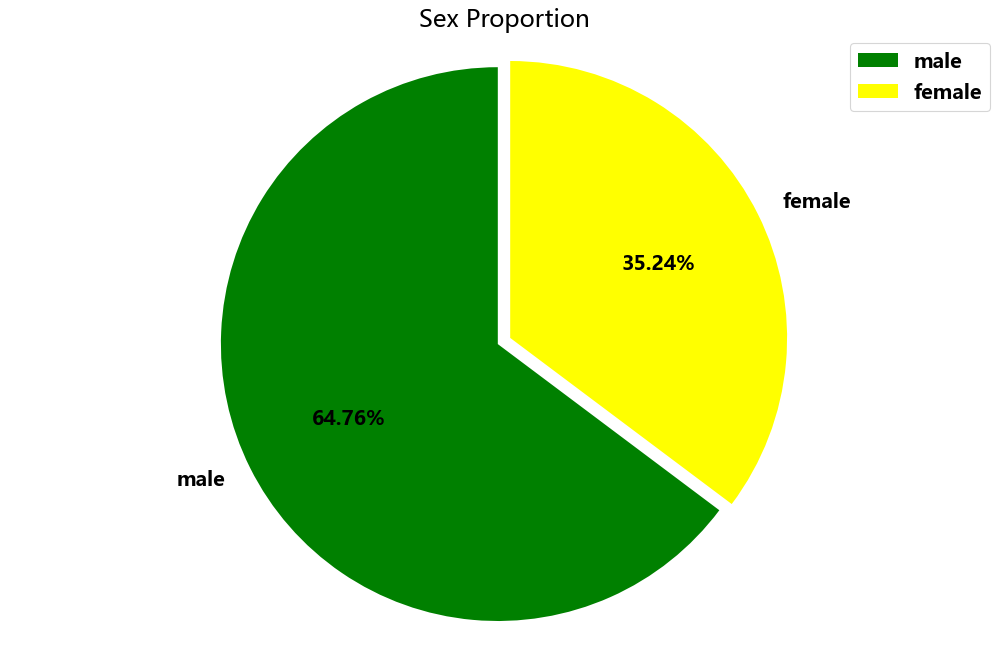

In [70]:
#绘制图性
import matplotlib
font={
    'family':'Microsoft YaHei',
    'weight':'bold',
    'size':18
}
matplotlib.rc('font',**font)
# 设置图片大小和分辨率
plt.figure(figsize=(16,10),dpi=80)
labels=titanic['Sex'].unique() #定义标签
sizes=titanic['Sex'].value_counts() # 每块值
colors=['green','yellow'] #颜色定义
explode=(0.05,0) # 将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2=plt.pie(sizes,
                            explode=explode,
                            labels=labels,
                            colors=colors,
                            autopct='%3.2f%%',
                            shadow=False,
                            startangle= 90,
                            pctdistance=0.6)
plt.axis('equal')
plt.title('Sex Proportion')
plt.legend()
plt.show()

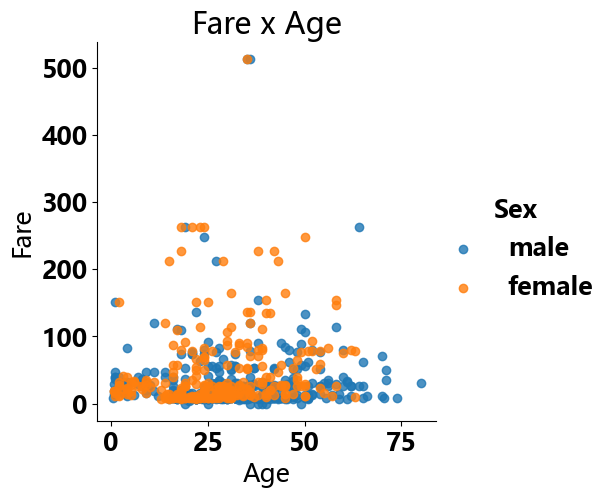

In [71]:
#绘制展示船票Fare
lm=sns.lmplot(x='Age',y='Fare',data=titanic,hue='Sex',fit_reg=False)
lm.set(title='Fare x Age')

In [72]:
titanic['Survived'].sum()

342

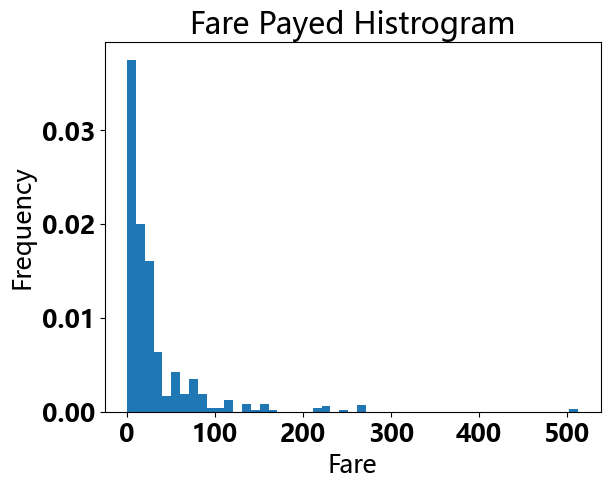

In [73]:
# 绘制一个展示船票的直方图
d=10
num_bins=int((titanic['Fare'].max()-titanic['Fare'].min())//d)
plt.hist(titanic['Fare'],num_bins,density=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()

# 探索Pokemon数据

In [74]:
import pandas as pd
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

pokemon = pd.DataFrame(raw_data)
pokemon


,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [75]:
# 添加一个新列
pokemon['place']=['xian', 'beijing', 'shanghai', 'nanjing']
pokemon

,name,evolution,type,hp,pokedex,place
0,Bulbasaur,Ivysaur,grass,45,yes,xian
1,Charmander,Charmeleon,fire,39,no,beijing
2,Squirtle,Wartortle,water,44,yes,shanghai
3,Caterpie,Metapod,bug,45,no,nanjing


In [76]:
# 查看每列数据属性
pokemon.dtypes

name         object
evolution    object
type         object
hp            int64
pokedex      object
place        object
dtype: object

In [77]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   evolution  4 non-null      object
 2   type       4 non-null      object
 3   hp         4 non-null      int64 
 4   pokedex    4 non-null      object
 5   place      4 non-null      object
dtypes: int64(1), object(5)
memory usage: 324.0+ bytes


# 探索Apple公司股价数据


In [78]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

filepath9 = "appl_1980_2014.csv"
apple = pd.read_csv(filepath9)
apple


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [79]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [80]:
# 将date这列改为datetime类型
apple['Date']=pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


In [81]:
apple.set_index('Date',inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [82]:
# 判断重复日期
apple[apple.index.duplicated()]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


In [83]:
# 将index设置为升序
apple.sort_index(ascending=True,inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [84]:
apple_month=apple.resample('BM').mean()
apple_month.head()

C:\Users\W10\AppData\Local\Temp\ipykernel_8544\349747702.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple_month=apple.resample('BM').mean()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [85]:
(apple.index.max()-apple.index.min()).days

12261

In [86]:
len(apple_month)

404

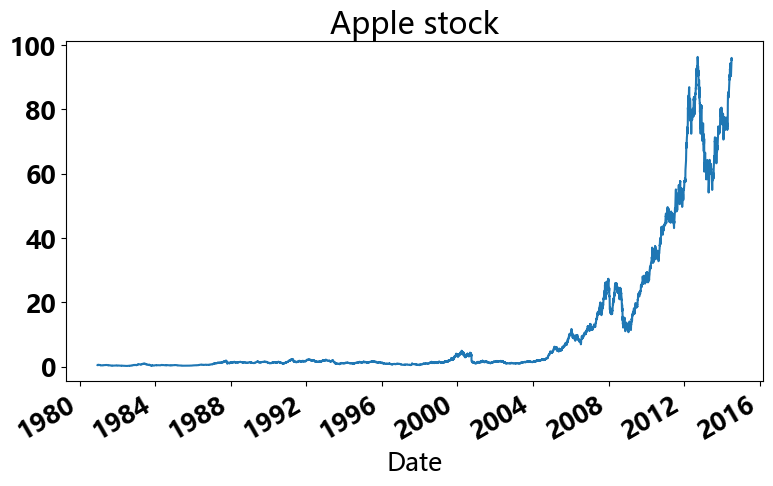

In [87]:
apple['Adj Close'].plot(title='Apple stock').get_figure().set_size_inches(9,5)

# 探索Iris纸鸢花数据

In [88]:
import pandas as pd
filepath10 = 'iris.data'
iris = pd.read_csv(filepath10, sep=',', header=None)
iris.columns=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [89]:
#缺失值
iris.isnull().values.any()

False

In [90]:
iris.loc[9:18,'petal_length']=np.nan
iris[8:20]

,sepal_length,sepal_width,petal_length,petal_width,class
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,NaN,0.1,Iris-setosa
10,5.4,3.7,NaN,0.2,Iris-setosa
11,4.8,3.4,NaN,0.2,Iris-setosa
12,4.8,3.0,NaN,0.1,Iris-setosa
13,4.3,3.0,NaN,0.1,Iris-setosa
14,5.8,4.0,NaN,0.2,Iris-setosa
15,5.7,4.4,NaN,0.4,Iris-setosa
16,5.4,3.9,NaN,0.4,Iris-setosa
17,5.1,3.5,NaN,0.3,Iris-setosa


In [91]:
# 缺失值全部替换成1.0
iris.fillna(value=1.0,inplace=True)
iris[8:20]

,sepal_length,sepal_width,petal_length,petal_width,class
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.0,0.1,Iris-setosa
10,5.4,3.7,1.0,0.2,Iris-setosa
11,4.8,3.4,1.0,0.2,Iris-setosa
12,4.8,3.0,1.0,0.1,Iris-setosa
13,4.3,3.0,1.0,0.1,Iris-setosa
14,5.8,4.0,1.0,0.2,Iris-setosa
15,5.7,4.4,1.0,0.4,Iris-setosa
16,5.4,3.9,1.0,0.4,Iris-setosa
17,5.1,3.5,1.0,0.3,Iris-setosa


In [92]:
del iris['class']

In [93]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [94]:
iris.loc[:3]=np.NaN
iris

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [95]:
# 删除有缺失值的行
iris.dropna(how='any',inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [96]:
# 重新设置索引
iris.reset_index(drop=True,inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.6,1.4,0.2
1,5.4,3.9,1.7,0.4
2,4.6,3.4,1.4,0.3
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2
...,...,...,...,...
141,6.7,3.0,5.2,2.3
142,6.3,2.5,5.0,1.9
143,6.5,3.0,5.2,2.0
144,6.2,3.4,5.4,2.3


# 泰坦尼克号生存数据特征处理


In [97]:
import pandas as pd 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_and_test=pd.concat([train,test],sort=False)
PassengerId=test['PassengerId']
train_and_test.set_index('PassengerId',inplace=True)
train_and_test



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S


In [98]:
# 找出数据中的众数
fare_mean=train_and_test['Fare'].mean()
fare_mean

31.726459439252338

In [99]:
# 对缺失值处理
# 对Embarkded 用众数填充
most_frequent=train_and_test['Embarked'].mode()[0]
train_and_test['Embarked'].fillna(most_frequent,inplace=True)
# 对Fare用均值填充
fare_mean=train_and_test['Fare'].mean()
train_and_test['Fare'].fillna(fare_mean,inplace=True)
train_and_test

C:\Users\W10\AppData\Local\Temp\ipykernel_8544\262003945.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_and_test['Embarked'].fillna(most_frequent,inplace=True)
C:\Users\W10\AppData\Local\Temp\ipykernel_8544\262003945.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S


In [100]:
# 不同特征字段的数据处理
# 对Embarked，sex以及pclass等用dummy处理
train_and_test=pd.get_dummies(train_and_test,columns=['Embarked','Sex','Pclass'])


In [101]:
# 票价分级处理
train_and_test['fare_category']=pd.cut(train_and_test['Fare'],5,labels=[1,2,3,4,5])
train_and_test

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,fare_category
PassengerId,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,True,False,False,True,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,True,False,False,1
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,True,False,False,False,True,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,True,False,True,False,False,1
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,False,True,False,True,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1,"Stanley, Miss. Amy Zillah Elsie",23.0,0,0,CA. 2314,7.5500,NaN,False,False,True,True,False,False,False,True,1
649,0,"Willey, Mr. Edward",NaN,0,0,S.O./P.P. 751,7.5500,NaN,False,False,True,False,True,False,False,True,1
577,1,"Garside, Miss. Ethel",34.0,0,0,243880,13.0000,NaN,False,False,True,True,False,False,True,False,1


In [108]:
# 名字处理
import re
train_and_test['title']=train_and_test['Name'].apply(lambda x: re.search(r'[a-zA-Z]+\.',x).group(0).strip('.'))
train_and_test['title'].unique()
titleDict = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev":  "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}
train_and_test['title']=train_and_test['title'].map(titleDict)
train_and_test['title'] = pd.factorize(train_and_test['title'])[0]
title_dummies_df = pd.get_dummies(train_and_test['title'], prefix=train_and_test[['title']].columns[0])
train_and_test = pd.concat([train_and_test, title_dummies_df], axis=1)
train_and_test.head()
# 提取长度特征
train_and_test['length']=train_and_test['Name'].apply(len)
#Cabin缺失值过多，将其分为有无两类，进行编码，如果缺失，即为0，否则为1;
train_and_test.loc[train_and_test.Cabin.isnull(),'Cabin']='nan'
train_and_test['Cabin']= train_and_test['Cabin'].apply(lambda x: 0 if x=='nan' else 1)
#是把Ticket 分类，如果有字母的为一类，没有字母的为一类,有字母的为一类，没有字母的为0）
train_and_test['ticket_levl']=train_and_test['Ticket'].astype(str).apply(lambda x : len(re.search('([a-zA-Z]+)',x).group(0)) if re.search('([a-zA-Z]+)',x) else 0 )

In [110]:
train_and_test = train_and_test.round(0)
df = pd.factorize(train_and_test['title'])[0]
df = pd.DataFrame({'id': range(len(df)), 'answer': df})
df.dropna(subset=['answer'], inplace=True)
df

,id,answer
0,0,0
1,1,1
2,2,2
3,3,1
4,4,0
...,...,...
1065,1065,2
1066,1066,0
1067,1067,2
1068,1068,0


In [111]:
df.to_csv('answer_5.csv', index=False, encoding='utf-8-sig') # 代码自动补全的快捷键是 tab；运行完成后，左侧文件树刷新下，可以找到这份文件